In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns

In [6]:
df_labels = pd.read_csv('csvjoinv2/microservices.join.node.csv')
df_features = pd.read_csv('../../network_specs/microservices.specs.csv', sep=';')

#df_features.drop(columns='state', inplace=True)

In [7]:
df_labels['State'] = np.where(
    df_labels['State'] == 'Recovered',
    0,
    1
)

In [8]:
df_labels['State'].value_counts()

0    302878
1     17778
Name: State, dtype: int64

In [9]:
df_labels['Id'].value_counts()

carts           22904
user-db         22904
orders-db       22904
rabbitmq        22904
orders          22904
front_end       22904
catalogue       22904
router          22904
catalogue-db    22904
queue-master    22904
carts-db        22904
user            22904
payment         22904
shipping        22904
Name: Id, dtype: int64

In [10]:
df_no_recover_proba = df_labels.groupby('Id')['State'].mean().reset_index(drop=False)
df_no_recover_proba

,Id,State
0,carts,0.000262
1,carts-db,0.058942
2,catalogue,0.004235
3,catalogue-db,0.238430
4,front_end,0.000000
5,orders,0.000044
6,orders-db,0.005108
7,payment,0.005108
8,queue-master,0.240831
9,rabbitmq,0.113343


In [11]:
df_data = df_no_recover_proba.merge(
    df_features,
    on='Id',
    how='left'
)

In [12]:
df_data['binary_state'] = df_data['State'] > 0.0

In [13]:
folder = './jsonDataReport'
roundData = {}

files = os.listdir(folder)
for fname in files:    
        with open(folder+'/'+fname, "r") as f:
            data = json.load(f)  
        node_nneigh = []
        for node_id, node_data in data['0'].items():
            node_data_small = {
                'Id': node_id,
                'nneighWithNodeInfo': node_data['nneighWithNodeInfo']
            }
            node_nneigh.append(node_data_small)
        df_nneigh = pd.DataFrame(node_nneigh)  
        break
        
df_nneigh.head() #nneighWithNodeInfo

,Id,nneighWithNodeInfo
0,catalogue-db,3
1,front_end,12
2,carts-db,4
3,rabbitmq,4
4,catalogue,7


In [14]:
df_data = df_data.merge(df_nneigh, on='Id', how='left')

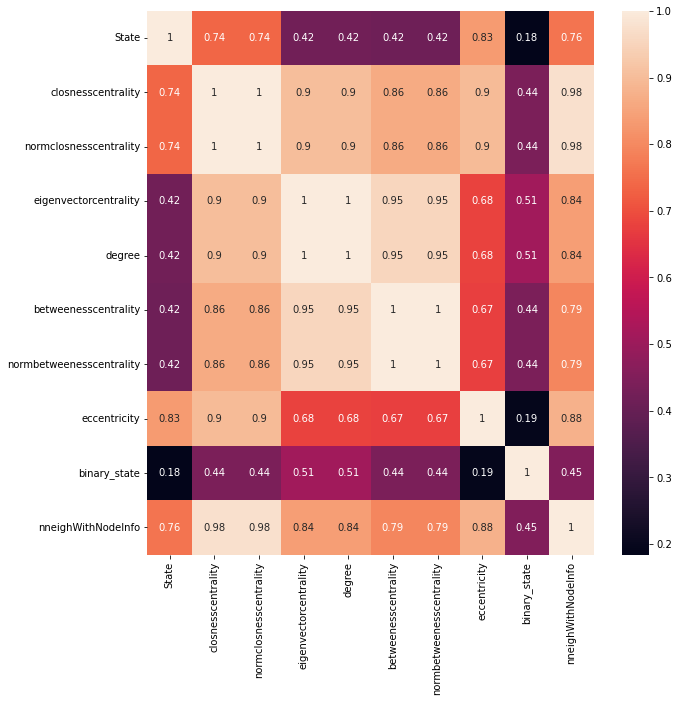

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(np.abs(df_data.corr()), annot=True)
plt.show()

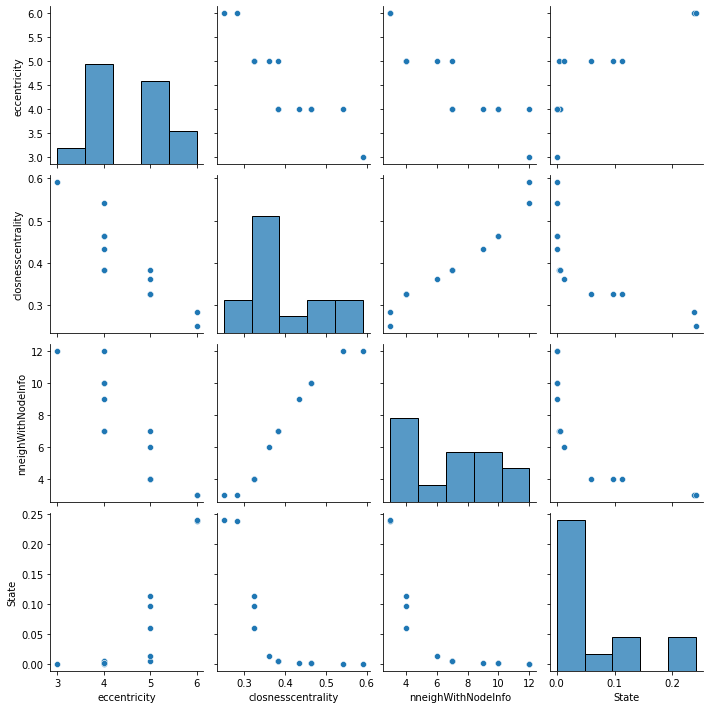

In [18]:
sns.pairplot(
    data=df_data[
        ['eccentricity',
         'closnesscentrality',
         'nneighWithNodeInfo',
         'State'
        ]
    ]
)

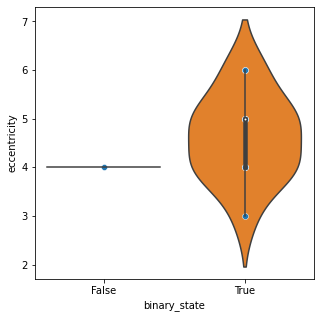

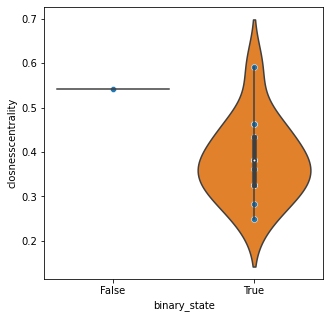

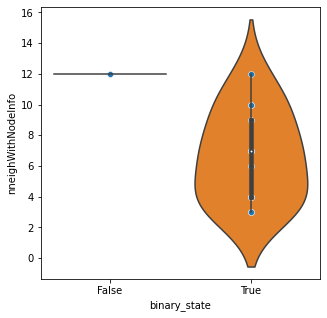

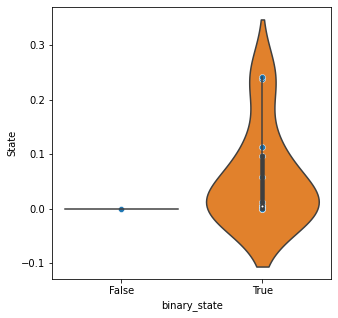

In [20]:
for col in ['eccentricity',
         'closnesscentrality',
         'nneighWithNodeInfo',
         'State']:
    plt.figure(figsize=(5,5))
    sns.violinplot(
        data=df_data,
        y=col,
        x='binary_state'
    )
    sns.scatterplot(
        data=df_data,
        y=col,
        x='binary_state'
    )
    plt.show()

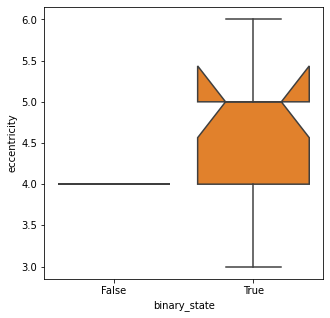

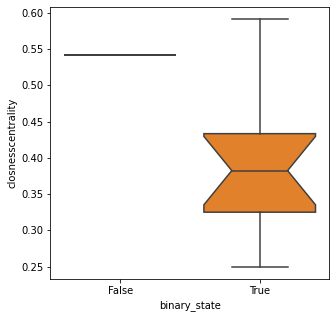

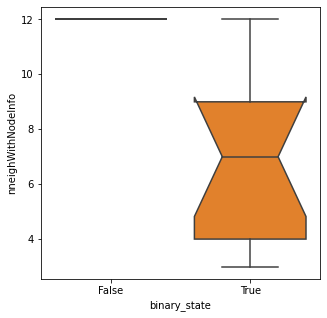

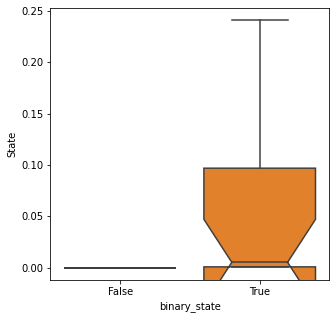

In [21]:
for col in ['eccentricity',
         'closnesscentrality',
         'nneighWithNodeInfo',
         'State']:
    plt.figure(figsize=(5,5))
    sns.boxplot(
        data=df_data,
        y=col,
        x='binary_state',
        notch=True
    )
    plt.show()

<AxesSubplot:ylabel='Frequency'>

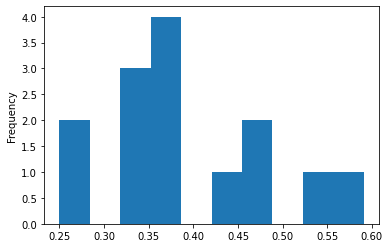

In [22]:
df_data['closnesscentrality'].plot(kind='hist', bins=10)

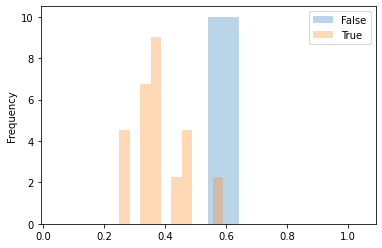

In [23]:
df_data.groupby('binary_state')['closnesscentrality'].plot(kind='hist', alpha=0.3, density=True)
plt.legend(loc='best')

<AxesSubplot:xlabel='closnesscentrality', ylabel='Count'>

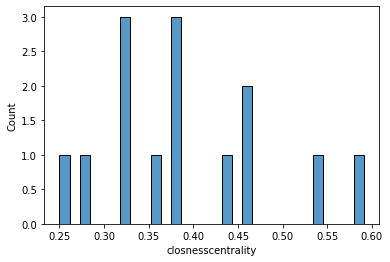

In [34]:
sns.histplot(
    data=df_data,
    x='closnesscentrality',
    bins=30
)

In [28]:
df_data.dtypes

Id                           object
State                       float64
closnesscentrality          float64
normclosnesscentrality      float64
eigenvectorcentrality       float64
degree                        int64
betweenesscentrality        float64
normbetweenesscentrality    float64
eccentricity                float64
binary_state                   bool
nneighWithNodeInfo            int64
dtype: object